# LISTA 2 DE MÉTODOS NUMÉRICOS I

Interpolação Polinomial

## Importando os pacotes que serão utilizados

In [ ]:
from methods.polynomial_interpolation import lagrange_interpolation
from utils.parser import evaluate_one_variable
from matplotlib import pyplot as plt
from numpy.typing import NDArray
import numpy as np

## Resolução das questões

### Questão 2

Dada a função f (x) = ln(x + 1), e os pontos x0=0,0; x1=0,6; x2=0,9 e x3 =1,1. Construa os polinômios de interpolação de Lagrange nos seguintes casos:
- a) Polinômio de grau 1, com os pontos x0 e x3 ,
- b) Polinômio de grau 2, com os pontos x0 , x1 e x3 ,
- c) Polinômio de grau 3, com os pontos x0 , x1 , x2 e x3 .

In [ ]:
func:str = "ln(x + 1)"
degree:list[int] = list(range(1,4))
points:NDArray = np.array([0.0, 0.6, 0.9, 1.1], dtype=np.float64)
xi:np.float64
specific_points:NDArray
pointwise_matrix:NDArray

#### Caso a)

In [ ]:
specific_points:NDArray = np.array([points[0], points[3]])
pointwise_matrix:NDArray = np.array([specific_points,
                                     [evaluate_one_variable(func, point) for point in specific_points]],
                                    dtype=np.float64)

In [ ]:
xi = np.float64(0.3)
lagrange_interpolation(pointwise_matrix, xi)

In [ ]:
xi = np.float64(0.75)
lagrange_interpolation(pointwise_matrix, xi)

#### Caso b)

In [ ]:
specific_points = np.array([points[0], points[1], points[3]])
pointwise_matrix = np.array([specific_points,
                            [evaluate_one_variable(func, point) for point in specific_points]],
                            dtype=np.float64)

In [ ]:
xi = np.float64(0.3)
lagrange_interpolation(pointwise_matrix, xi)

In [ ]:
xi = np.float64(0.75)
lagrange_interpolation(pointwise_matrix, xi)

#### Caso c)

In [ ]:
pointwise_matrix = np.array([points,
                            [evaluate_one_variable(func, point) for point in points]],
                            dtype=np.float64)

In [ ]:
xi = np.float64(0.3)
lagrange_interpolation(pointwise_matrix, xi)

In [ ]:
xi = np.float64(0.75)
lagrange_interpolation(pointwise_matrix, xi)

### Questão 3

A função de Runge é definida como f(x) = 1/(1 + x^2).
- a) Desejamos construir o polinômio interpolante de Lagrange no intervalo [−5,5] com pontos equidistantes para n = 4, 6, 8 e 12.
- b) Em cada caso construa um gráfico contendo a função de Runge, os pontos de interpolação e o Polinômio de Lagrange.
- c) A partir dos gráficos comente sobre a acurácia da interpolação no centro do intervalo, e nos extremos. Explique o comportamento observado.
- d) Pesquise na literatura e encontre uma alternativa para aprimorar a interpolação descartando o uso de Splines ou qualquer estratégia de interpolação por partes.

#### Caso a)

In [13]:
func:str = "1 / (1 + x**2)"
degree:list[int] = [4, 6, 8, 12]
equidistant_points:list[NDArray] = []
y:list[NDArray] = []
x_interpolated:NDArray = np.linspace(-5, 5, 11, dtype=np.float64)
y_interpolated:list[list] = [[] for _ in range(len(degree))]
y_true:NDArray = np.array([evaluate_one_variable(func, point) for point in x_interpolated], dtype=np.float64)


for n in degree:
    points:NDArray = np.linspace(-5, 5, n + 1, dtype=np.float64)
    equidistant_points.append(points)
    y.append(np.array([evaluate_one_variable(func, point) for point in points], dtype=np.float64))

equidistant_points

In [ ]:
for i in range(len(equidistant_points)):
    # Criando matriz de pontos no formato correto
    pointwise_matrix = np.array([equidistant_points[i],
                                y[i]],
                                dtype=np.float64)

    # Interpolando para cada ponto em x_interpolated
    for point in x_interpolated:
        y_interpolated[i].append(lagrange_interpolation(pointwise_matrix, point))

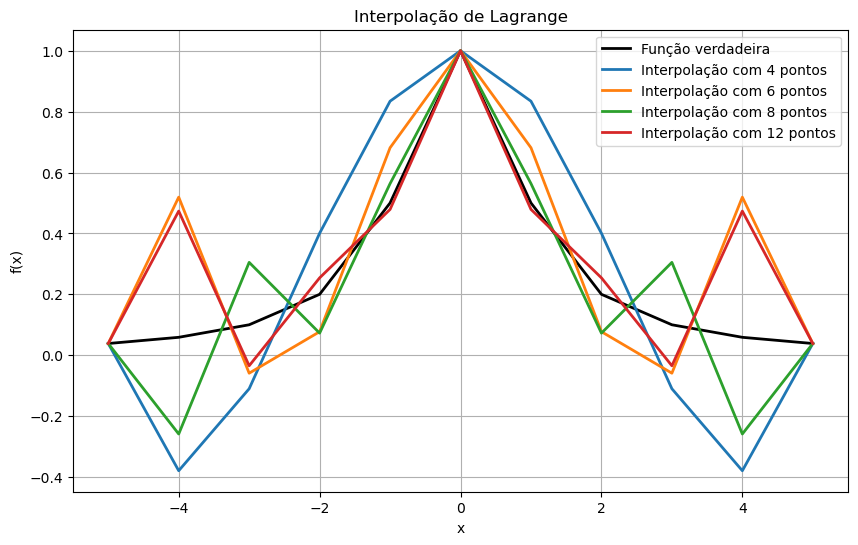

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_interpolated, y_true, label="Função verdadeira", color="black", linewidth=2)
for i in range(len(equidistant_points)):
    ax.plot(x_interpolated, y_interpolated[i], label=f"Interpolação com {degree[i]} pontos", linewidth=2)
ax.legend()
ax.set_title("Interpolação de Lagrange")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.grid()
plt.show()
# Exemplo de uso da função de interpolação de Lagrange

#### Caso b)

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_interpolated)
plt.show()